In [11]:
from fastai import *
from torchvision.models import *
from fastai.vision.all import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import torch
import cv2
import numpy as np
import pandas as pd
import glob

In [12]:
allpic = glob.glob('p14_joints/*.png')
allpic.sort()
fnames =[]
for i in allpic:
    if "image"in i:
        fnames.append(i)
        
posedata = glob.glob('p14_joints/*.npy')
posedata.sort()
xy=[]
for i in posedata:
    n=np.load(i)
    xy.append(torch.tensor([[int(n[0][13]),int(n[1][13])],
                            [int(n[0][12]),int(n[1][12])],
                            [int(n[0][11]),int(n[1][11])],
                            [int(n[0][10]),int(n[1][10])], 
                            [int(n[0][9]),int(n[1][9])],
                            [int(n[0][8]),int(n[1][8])],
                            [int(n[0][7]),int(n[1][7])],
                            [int(n[0][6]),int(n[1][6])],
                            [int(n[0][5]),int(n[1][5])],
                            [int(n[0][4]),int(n[1][4])],
                            [int(n[0][3]),int(n[1][3])],
                            [int(n[0][2]),int(n[1][2])],
                            [int(n[0][1]),int(n[1][1])],
                            [int(n[0][0]),int(n[1][0])]]))
    
train = pd.DataFrame({
    'id':range(len(fnames)) ,
    'x,y' : xy,
    'fname':fnames })
train

,id,"x,y",fname
0,0,"[[tensor(132), tensor(53)], [tensor(125), tensor(112)], [tensor(186), tensor(201)], [tensor(185), tensor(214)], [tensor(172), tensor(150)], [tensor(76), tensor(151)], [tensor(53), tensor(213)], [tensor(83), tensor(189)], [tensor(138), tensor(461)], [tensor(160), tensor(386)], [tensor(140), tensor(286)], [tensor(106), tensor(287)], [tensor(103), tensor(389)], [tensor(100), tensor(483)]]",p14_joints\00000_image.png
1,1,"[[tensor(223), tensor(46)], [tensor(159), tensor(82)], [tensor(161), tensor(268)], [tensor(138), tensor(200)], [tensor(161), tensor(131)], [tensor(136), tensor(117)], [tensor(113), tensor(185)], [tensor(131), tensor(251)], [tensor(128), tensor(477)], [tensor(165), tensor(365)], [tensor(141), tensor(258)], [tensor(132), tensor(253)], [tensor(151), tensor(356)], [tensor(64), tensor(435)]]",p14_joints\00001_image.png
2,2,"[[tensor(168), tensor(67)], [tensor(141), tensor(125)], [tensor(249), tensor(144)], [tensor(207), tensor(187)], [tensor(152), tensor(156)], [tensor(150), tensor(144)], [tensor(194), tensor(161)], [tensor(244), tensor(123)], [tensor(65), tensor(459)], [tensor(122), tensor(368)], [tensor(99), tensor(279)], [tensor(106), tensor(280)], [tensor(163), tensor(364)], [tensor(136), tensor(468)]]",p14_joints\00002_image.png
3,3,"[[tensor(288), tensor(97)], [tensor(273), tensor(126)], [tensor(400), tensor(272)], [tensor(360), tensor(221)], [tensor(316), tensor(169)], [tensor(214), tensor(135)], [tensor(142), tensor(133)], [tensor(90), tensor(117)], [tensor(231), tensor(494)], [tensor(265), tensor(393)], [tensor(251), tensor(284)], [tensor(213), tensor(278)], [tensor(175), tensor(375)], [tensor(161), tensor(478)]]",p14_joints\00003_image.png
4,4,"[[tensor(124), tensor(39)], [tensor(114), tensor(98)], [tensor(203), tensor(148)], [tensor(181), tensor(171)], [tensor(150), tensor(125)], [tensor(83), tensor(137)], [tensor(42), tensor(184)], [tensor(58), tensor(210)], [tensor(58), tensor(421)], [tensor(126), tensor(353)], [tensor(126), tensor(263)], [tensor(115), tensor(265)], [tensor(168), tensor(330)], [tensor(132), tensor(426)]]",p14_joints\00004_image.png
...,...,...,...
8123,8123,"[[tensor(197), tensor(26)], [tensor(206), tensor(89)], [tensor(228), tensor(261)], [tensor(247), tensor(203)], [tensor(239), tensor(138)], [tensor(162), tensor(121)], [tensor(148), tensor(185)], [tensor(99), tensor(206)], [tensor(186), tensor(467)], [tensor(188), tensor(366)], [tensor(198), tensor(263)], [tensor(170), tensor(258)], [tensor(146), tensor(359)], [tensor(204), tensor(418)]]",p14_joints\08123_image.png
8124,8124,"[[tensor(178), tensor(53)], [tensor(195), tensor(106)], [tensor(312), tensor(217)], [tensor(277), tensor(184)], [tensor(242), tensor(138)], [tensor(147), tensor(141)], [tensor(125), tensor(185)], [tensor(74), tensor(218)], [tensor(185), tensor(439)], [tensor(213), tensor(374)], [tensor(212), tensor(273)], [tensor(176), tensor(273)], [tensor(177), tensor(362)], [tensor(188), tensor(456)]]",p14_joints\08124_image.png
8125,8125,"[[tensor(162), tensor(16)], [tensor(152), tensor(73)], [tensor(197), tensor(117)], [tensor(205), tensor(166)], [tensor(199), tensor(110)], [tensor(107), tensor(112)], [tensor(99), tensor(175)], [tensor(94), tensor(222)], [tensor(161), tensor(406)], [tensor(173), tensor(318)], [tensor(166), tensor(235)], [tensor(132), tensor(235)], [tensor(127), tensor(313)], [tensor(123), tensor(399)]]",p14_joints\08125_image.png
8126,8126,"[[tensor(172), tensor(36)], [tensor(169), tensor(86)], [tensor(250), tensor(268)], [tensor(238), tensor(198)], [tensor(221), tensor(128)], [tensor(112), tensor(125)], [tensor(96), tensor(194)], [tensor(82), tensor(267)], [tensor(172), tensor(451)], [tensor(182), tensor(332)], [tensor(174), tensor(255)], [tensor(136), tensor(253)], [tensor(124), tensor(322)], [tensor(128), tensor(444)]]",p14_joints\08126_image.png


tensor([[132,  53],
        [125, 112],
        [186, 201],
        [185, 214],
        [172, 150],
        [ 76, 151],
        [ 53, 213],
        [ 83, 189],
        [138, 461],
        [160, 386],
        [140, 286],
        [106, 287],
        [103, 389],
        [100, 483]])


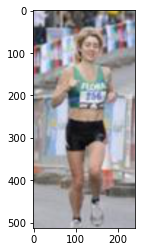

In [13]:
im = cv2.imread(train.iloc[0,2])
x=train.iloc[0,1]
print(x)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

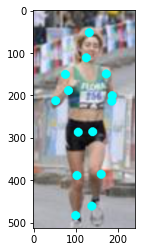

In [14]:
for i in range(14):
    cv2.circle(im, (int(x[i][0]), int(x[i][1])), 10, (255,255,0), thickness=-1, lineType=cv2.FILLED)
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

In [15]:
# #create datablock that does 0.2 random split for validation
splitter = RandomSplitter(valid_pct=0.2, seed=42)
dblock = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_x=ColReader(2), #x is stored in column 2
    get_y=ColReader(1), #y is stored in column 1
    splitter=splitter, #use parent folder as train-valid split
    item_tfms=Resize(224, method=ResizeMethod.Squish), 
    batch_tfms=aug_transforms(mult=2), 
    )

dls = dblock.dataloaders(train, path='.', bs=64) 

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


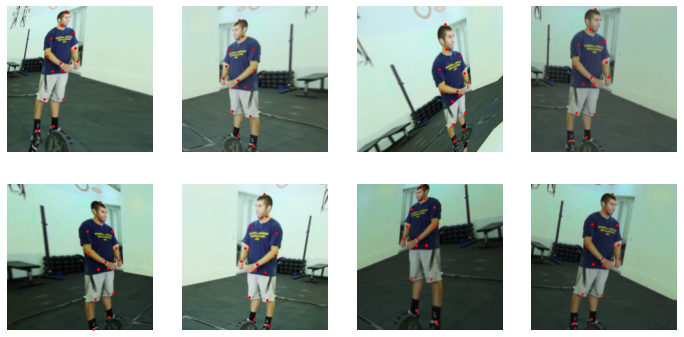

In [16]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

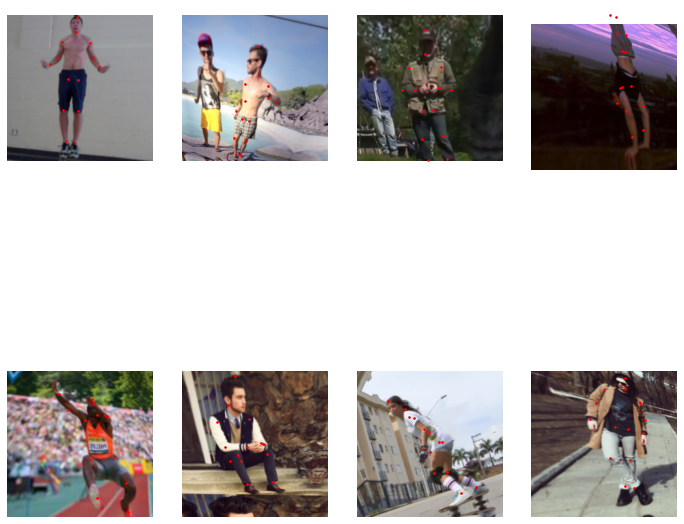

In [18]:
dls.show_batch(max_n=8, figsize=(12,12))

In [19]:
learn = cnn_learner(dls, models.resnet34)

In [ ]:
learn.lr_find()

In [20]:
 learn.fine_tune(epochs=5,
          base_lr=21e-4, #max lr; when unfrozen base_lr/2
          freeze_epochs=1, #how many epochs to train frozen
          lr_mult=100, #train feature extractor with max lr at base_lr/lr_mult
          pct_start=0.2, #start decreasing lr at 
          div=5.0
          )

epoch,train_loss,valid_loss,time
0,2.178017,0.310847,25:19


epoch,train_loss,valid_loss,time
0,0.720358,0.127419,33:24
1,0.289148,0.064625,28:14
2,0.133244,0.055446,24:01
3,0.087292,0.049560,24:40
4,0.075654,0.049863,23:21


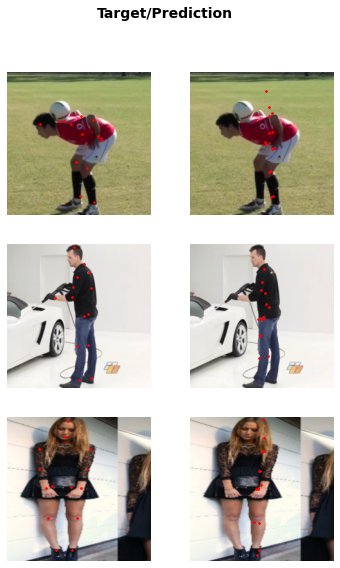

In [21]:
learn.show_results(nrows=3)

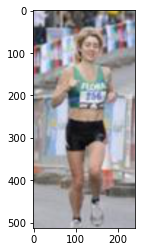

In [33]:
img = cv2.imread(train.iloc[0,2])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
learn.predict(img)

In [35]:
def get_position(i,test_img):return (int(int(y[0][i][0])*(test_img.shape[0])/224),int(int(y[0][i][1])*(test_img.shape[1])/224))

In [ ]:
y=learn.predict(img)
print(get_position(1,img))
for i in range(len(y[0])):
    cv2.circle(img, get_position(i,img), 10, (255,255,0), thickness=-1, lineType=cv2.FILLED)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [44]:
learn = load_learner(path/'export.pkl')

In [27]:
learn.unfreeze()

SuggestedLRs(valley=tensor(0.0003))

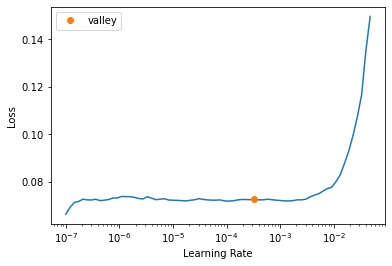

In [35]:
learn.lr_find()

In [28]:
learn.fit_one_cycle(5, slice(3e-4))

epoch,train_loss,valid_loss,time
0,0.069839,0.047377,22:33
1,0.062980,0.045110,21:27


FileNotFoundError: [Errno 2] No such file or directory: 'p14_joints\\06731_image.png'

In [ ]:
learn.show_results(nrows=3)